In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from matplotlib import pyplot
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder

# Quiz 1

In [3]:
data = pd.read_csv('drive/MyDrive/Colab_Notebooks_2/data/train.csv')

In [4]:
y = data.iloc[:,0]
X = data.iloc[:,1:]
X = X/255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
ohc = OneHotEncoder(sparse_output=False)
y_train = ohc.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = ohc.transform(np.array(y_test).reshape(-1, 1))
n_features = X_train.shape[1]

In [53]:
# RELU
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0, validation_split=0.3)
y_pred = model.predict(X_test)
acc = sum(np.argmax(y_pred, axis=1)==np.argmax(y_test, axis=1))/y_test.shape[0]
print(f'Accuracy ReLU: {acc}')

394/394 [==============================] - 1s 2ms/step
Accuracy ReLU: 0.8954761904761904


In [68]:
# Sigmoid
# define model
model = Sequential()
model.add(Dense(10, activation='sigmoid', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(20, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(5, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0, validation_split=0.3)
y_pred = model.predict(X_test)
acc = sum(np.argmax(y_pred, axis=1)==np.argmax(y_test, axis=1))/y_test.shape[0]
print(f'Accuracy Sigmoid: {acc}')

394/394 [==============================] - 1s 2ms/step
Accuracy Sigmoid: 0.7684920634920634


In [55]:
# Tanh
# define model
model = Sequential()
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(20, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(5, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0, validation_split=0.3)
y_pred = model.predict(X_test)
acc = sum(np.argmax(y_pred, axis=1)==np.argmax(y_test, axis=1))/y_test.shape[0]
print(f'Accuracy Tanh: {acc}')

394/394 [==============================] - 2s 4ms/step
Accuracy Tanh: 0.888015873015873


# Quiz 2

In [62]:
# RELU
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
y_pred = model.predict(X_test)
acc = sum(np.argmax(y_pred, axis=1)==np.argmax(y_test, axis=1))/y_test.shape[0]
print(f'Accuracy w/o Dropout: {acc}')

394/394 [==============================] - 1s 2ms/step
Accuracy ReLU: 0.8809523809523809


In [65]:
# RELU
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
y_pred = model.predict(X_test)
acc = sum(np.argmax(y_pred, axis=1)==np.argmax(y_test, axis=1))/y_test.shape[0]
print(f'Accuracy w/ Dropout: {acc}')

394/394 [==============================] - 1s 2ms/step
Accuracy w/ Dropout: 0.47015873015873016


In [64]:
# RELU
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
y_pred = model.predict(X_test)
acc = sum(np.argmax(y_pred, axis=1)==np.argmax(y_test, axis=1))/y_test.shape[0]
print(f'Accuracy w/ Dropout: {acc}')

394/394 [==============================] - 1s 2ms/step
Accuracy w/ Dropout: 0.8988095238095238


# Quiz 3

In [70]:
# Baseline
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
y_pred = model.predict(X_test)
acc = sum(np.argmax(y_pred, axis=1)==np.argmax(y_test, axis=1))/y_test.shape[0]
print(f'Accuracy ReLU: {acc}')

Epoch 1/10
919/919 [==============================] - 5s 2ms/step - loss: 1.1664 - accuracy: 0.5778
Epoch 2/10
919/919 [==============================] - 2s 2ms/step - loss: 0.4734 - accuracy: 0.8672
Epoch 3/10
919/919 [==============================] - 2s 2ms/step - loss: 0.3588 - accuracy: 0.8976
Epoch 4/10
919/919 [==============================] - 2s 2ms/step - loss: 0.3145 - accuracy: 0.9096
Epoch 5/10
919/919 [==============================] - 2s 2ms/step - loss: 0.2872 - accuracy: 0.9159
Epoch 6/10
919/919 [==============================] - 3s 3ms/step - loss: 0.2668 - accuracy: 0.9226
Epoch 7/10
919/919 [==============================] - 2s 3ms/step - loss: 0.2521 - accuracy: 0.9276
Epoch 8/10
919/919 [==============================] - 2s 2ms/step - loss: 0.2408 - accuracy: 0.9310
Epoch 9/10
919/919 [==============================] - 2s 2ms/step - loss: 0.2312 - accuracy: 0.9340
Epoch 10/10
394/394 [==============================] - 1s 2ms/step
Accuracy ReLU: 0.9219047619047619

In [69]:
# Batch normalization
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
y_pred = model.predict(X_test)
acc = sum(np.argmax(y_pred, axis=1)==np.argmax(y_test, axis=1))/y_test.shape[0]
print(f'Accuracy Batch Normalization: {acc}')

Epoch 1/10
919/919 [==============================] - 5s 3ms/step - loss: 1.1103 - accuracy: 0.6670
Epoch 2/10
919/919 [==============================] - 5s 5ms/step - loss: 0.5452 - accuracy: 0.8496
Epoch 3/10
919/919 [==============================] - 3s 3ms/step - loss: 0.4486 - accuracy: 0.8727
Epoch 4/10
919/919 [==============================] - 3s 3ms/step - loss: 0.4026 - accuracy: 0.8853
Epoch 5/10
919/919 [==============================] - 3s 3ms/step - loss: 0.3750 - accuracy: 0.8923
Epoch 6/10
919/919 [==============================] - 4s 5ms/step - loss: 0.3528 - accuracy: 0.8993
Epoch 7/10
919/919 [==============================] - 3s 3ms/step - loss: 0.3370 - accuracy: 0.9030
Epoch 8/10
919/919 [==============================] - 3s 3ms/step - loss: 0.3259 - accuracy: 0.9045
Epoch 9/10
919/919 [==============================] - 3s 3ms/step - loss: 0.3209 - accuracy: 0.9070
Epoch 10/10
394/394 [==============================] - 1s 2ms/step
Accuracy Batch Normalization: 0.9

# Quiz 4

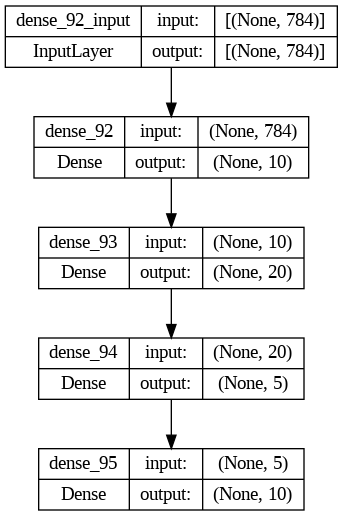

In [71]:
plot_model(model, show_shapes=True)

Epoch 1/10
919/919 [==============================] - 7s 5ms/step - loss: 1.1338 - accuracy: 0.6562 - val_loss: 0.6283 - val_accuracy: 0.8170
Epoch 2/10
919/919 [==============================] - 6s 6ms/step - loss: 0.5897 - accuracy: 0.8400 - val_loss: 0.4572 - val_accuracy: 0.8721
Epoch 3/10
919/919 [==============================] - 5s 5ms/step - loss: 0.4834 - accuracy: 0.8680 - val_loss: 0.4507 - val_accuracy: 0.8702
Epoch 4/10
919/919 [==============================] - 4s 4ms/step - loss: 0.4336 - accuracy: 0.8821 - val_loss: 0.4031 - val_accuracy: 0.8861
Epoch 5/10
919/919 [==============================] - 5s 6ms/step - loss: 0.4129 - accuracy: 0.8886 - val_loss: 0.3797 - val_accuracy: 0.8945
Epoch 6/10
919/919 [==============================] - 4s 4ms/step - loss: 0.3944 - accuracy: 0.8935 - val_loss: 0.3657 - val_accuracy: 0.8975
Epoch 7/10
919/919 [==============================] - 4s 4ms/step - loss: 0.3789 - accuracy: 0.8975 - val_loss: 0.3666 - val_accuracy: 0.8975
Epoch 

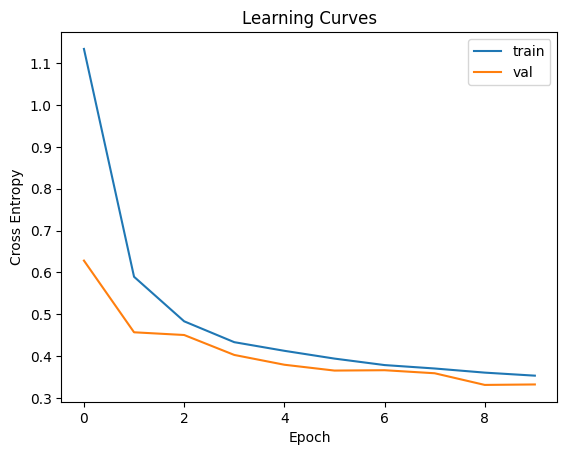

In [74]:
# Batch normalization
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# Quiz 5

In [12]:
x_train = np.reshape(X_train.values, (-1,28,28,1))
x_test = np.reshape(X_test.values, (-1,28,28,1))
in_shape = x_train.shape[1:]

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)


Epoch 1/10
230/230 [==============================] - 6s 5ms/step - loss: 0.3734 - accuracy: 0.8834
Epoch 2/10
230/230 [==============================] - 1s 4ms/step - loss: 0.1242 - accuracy: 0.9616
Epoch 3/10
230/230 [==============================] - 1s 5ms/step - loss: 0.0763 - accuracy: 0.9767
Epoch 4/10
230/230 [==============================] - 1s 4ms/step - loss: 0.0514 - accuracy: 0.9842
Epoch 5/10
230/230 [==============================] - 1s 4ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 6/10
230/230 [==============================] - 1s 4ms/step - loss: 0.0275 - accuracy: 0.9914
Epoch 7/10
230/230 [==============================] - 1s 4ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 8/10
230/230 [==============================] - 1s 4ms/step - loss: 0.0158 - accuracy: 0.9950
Epoch 9/10
230/230 [==============================] - 1s 5ms/step - loss: 0.0111 - accuracy: 0.9964
Epoch 10/10
230/230 [==============================] - 1s 5ms/step - loss: 0.0136 - accuracy: 0.9956

In [16]:
# make a prediction
image = x_train[0]
yhat = model.predict(np.asarray([image]))
print('Predicted: class=%d' % np.argmax(yhat))

1/1 [==============================] - 0s 206ms/step
Predicted: class=4
